# My journey. My thinkings and my workprocess to tackle the given problem

Here in this notebook, I have kept a step by step analysis on my working. So as all I started by importing the then necessary modules.

In [1]:
import cv2
import matplotlib.pyplot as plt

But sice this is a CNN model so then realised that the manditory modules must be included. Initially was confused whether to proceed with tflearn API or Keras API or use simple tensorflow.
Next step was opening the documentation of each module mentioned above
Keras: https://keras.io/guides/functional_api/
Tflearn: http://tflearn.org/
Tensorflow: https://www.tensorflow.org/guide

Next read the doc provided by IIIT_D. Decided to proceed with Keras as I was most comfortable with it.

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D
from keras.utils import np_utils

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

Now we required our dataset to be imported hence, need the os module. Also to make my importing of images professional let us use tqdm module. Lastly the king of python numerical calculation module namely numpy.

In [3]:
import os
from tqdm import tqdm
import numpy as np

# First try for importing data.

In [4]:
path="D://datasets//IIIT_D//train";
fol=os.listdir(path)

But wait let me first check on one image to see its dimensions

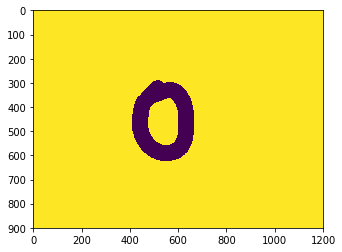

In [5]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample001//img001-008.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

Now went to my folder where the dataset was downloaded as to check is the picture coloured or not. Although even if it was coloured, I have used Grayscale
while importing hence, this coloured background made no sense. It quickly struck me that the imshow() in matplotlib and cv2 have different default colouing layers.
Thus, searched on google as to how to print this on matplotlib. Found the documentation of matplotlib - https://matplotlib.org/stable/tutorials/colors/colormaps.html

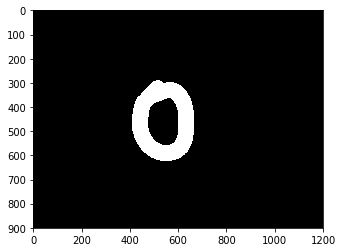

In [6]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample001//img001-008.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap=plt.cm.binary)

Now that the shade looks ok, I checked the dimension of the image

In [7]:
print(img.shape)

(900, 1200)


The ratio of the image is 3:4 So, initially tried with (150,200) where 150:200=3:4. Hence, just need to reshape our image that way and check if the image still has all the important data points.

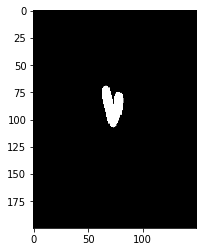

In [8]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample058//img058-008.png",cv2.IMREAD_GRAYSCALE)/255
img1=cv2.resize(img,(150,200))
plt.imshow(img1,cmap=plt.cm.binary)

Orientation distorted so lets check with 200,150

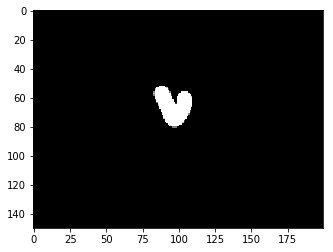

In [9]:
img=cv2.imread("D://datasets//IIIT_D//train//Sample058//img058-008.png",cv2.IMREAD_GRAYSCALE)/255
img1=cv2.resize(img,(200,150))
plt.imshow(img1,cmap=plt.cm.binary)

Ok good to go. So next I defined the empty lists and imported the images there 

# Next Step: Accessing the dataset from the local machine in X and y lists.

In [10]:
X,y=list(),list();
size=len(fol);
for val,i in tqdm(enumerate(fol)):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(200,150)),(200,150,1))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.

0it [00:00, ?it/s]


NameError: name 'one_hot' is not defined

Ok now that we have our dataset imported let us move to define our one_hot code

In [11]:
def one_hot(val,size):
    a=np.array(np.zeros((1,size)));
    a[0][val]=1;
    return a;

In [12]:
X,y=list(),list();
size=len(fol);
for val,i in tqdm(enumerate(fol)):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(200,150)),(200,150,1))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.

62it [01:52,  1.88s/it]


Ok so we are ready to get our model for training the dataset.

In [13]:
model = Sequential()
model.add(Conv2D(248, kernel_size=5, activation='relu',border_mode='same', input_shape=(200,150,1)))
model.add(Convolution2D(62, (5, 5), activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(62, activation='softmax'))
model.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, kernel_size=5, activation="relu", input_shape=(200, 150,..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, (5, 5), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 150, 248)     6448      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 150, 62)      384462    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 75, 62)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 75, 62)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 465000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                28830062  
Total params: 29,220,972
Trainable params: 29,220,972
Non-trainable params: 0
________________________________________________________________

I was overconscious about the effect of overfitting and underfitting so wanted to start with small networks and if failed then move on to biggere networks. As a result our this model failed
More of a disaster if one wanna say.

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print(history.history)

NameError: name 'X_train_arr' is not defined

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,h,w,d=X_train_arr.shape

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print(history.history)

ValueError: Error when checking target: expected dense_1 to have 2 dimensions, but got array with shape (2108, 1, 62)

Well I tried a lot but could not remove this error on the first two days. I was totally focussing on the fact that this error was involved with my training images's dimensions.
I chenged the dimensions from (200,150,1) to (1,150,200). Obviously this did not work. It does nothing but reshape the image in some other axis.
It was giving me 3 dimensions.
I start calculating
X= 4 dimensional array(2108,200,150,1)-----> passed on 1st layer
number of parameters in this layer = 1x200x150x248=7440000 weights----> output dimension(2108,200,150,248)
----> passed into second layer
number of parameters here=200x150x248x62=461,280,000--->output dimension(2108,200,150,62).
Passed it through max_2d_pooling layer---->(2,2) kernel so here we create a 2x2 window over the previous matrix and pull the maximum of all
---->output dimension =(2108,200/2,150/2,62)=(2108,100,75,62)---->Flatten to (2108,62) each image mapped to a straight vector.
----> Then pass onto Dense layer which is actually a fully connected layer to previous layer. So dimension definitely will not change
So our input files are giving (2108,62) as dimension and not (2108,1,62) as dimension. I was completely lost here.


After through checking I understood that this was my output one_hot vector dimensions which was clashing and if one sees my this version of one hot vector()---> it declares a numpy array of zeroes of (1,62) which is a 2D array and then for 2108 times if we accumulate this value, it will give me a 3D array (2108,1,62). Hence, Now I had to change the one_hot() completely (as shown below)

# New version of one_hot()

In [17]:
def one_hot(val,size):
    a=np.array([0]*size);
    a[val]=1;
    return a;

After this, I rerun and reload the dataset. Then finally running in 3 different models to find the better output

In [20]:
X,y=list(),list();
for val,i in tqdm(enumerate(fol)):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(50,50)),(50,50,1))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.

62it [01:45,  1.66s/it]


# Splitting the dataset

The data is splitted into training and cross validation sets. Cross validation size 15% of total data. It aids our results and gives a genuine boost
in our accuracy

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,h,w,d=X_train_arr.shape

# MODEL 1

In [24]:
 model=Sequential()
model.add(Conv2D(62, (5, 5), activation='relu',border_mode='same',input_shape=(h,w,d)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(124, (5, 5), activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
'''model.add(Convolution2D(124, (5, 5), activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))'''
model.add(Conv2D(62, (5, 5), activation='relu',border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
'''model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))'''
model.add(Dense(62, activation='softmax'))
model.summary()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, (5, 5), activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(124, (5, 5), activation="relu", padding="same")`
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, (5, 5), activation="relu", padding="same")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 62)        1612      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 62)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 124)       192324    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 124)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 62)        192262    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 62)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 62)          0         
__________

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
feeds=model.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print(feeds.history)

Train on 2108 samples, validate on 372 samples
Epoch 1/10
2108/2108 [==============================] - ETA: 24:45 - loss: 4.1396 - acc: 0.0000e+ - ETA: 12:12 - loss: 4.1324 - acc: 0.0312   - ETA: 5:56 - loss: 4.1723 - acc: 0.0156 - ETA: 3:50 - loss: 4.1677 - acc: 0.015 - ETA: 2:47 - loss: 4.1588 - acc: 0.015 - ETA: 2:09 - loss: 4.1534 - acc: 0.015 - ETA: 1:44 - loss: 4.1500 - acc: 0.013 - ETA: 1:26 - loss: 4.1479 - acc: 0.011 - ETA: 1:12 - loss: 4.1457 - acc: 0.011 - ETA: 1:02 - loss: 4.1431 - acc: 0.019 - ETA: 53s - loss: 4.1414 - acc: 0.017 - ETA: 47s - loss: 4.1403 - acc: 0.01 - ETA: 41s - loss: 4.1394 - acc: 0.01 - ETA: 36s - loss: 4.1391 - acc: 0.01 - ETA: 32s - loss: 4.1388 - acc: 0.01 - ETA: 28s - loss: 4.1378 - acc: 0.01 - ETA: 25s - loss: 4.1370 - acc: 0.01 - ETA: 22s - loss: 4.1364 - acc: 0.01 - ETA: 19s - loss: 4.1358 - acc: 0.01 - ETA: 17s - loss: 4.1354 - acc: 0.01 - ETA: 15s - loss: 4.1348 - acc: 0.01 - ETA: 13s - loss: 4.1344 - acc: 0.01 - ETA: 12s - loss: 4.1339 - acc: 

2108/2108 [==============================] - ETA: 4s - loss: 0.8833 - acc: 0.843 - ETA: 4s - loss: 0.8431 - acc: 0.843 - ETA: 4s - loss: 0.9786 - acc: 0.781 - ETA: 4s - loss: 1.0266 - acc: 0.750 - ETA: 4s - loss: 1.0451 - acc: 0.725 - ETA: 4s - loss: 1.0036 - acc: 0.718 - ETA: 4s - loss: 1.0315 - acc: 0.700 - ETA: 4s - loss: 1.0140 - acc: 0.714 - ETA: 4s - loss: 1.0010 - acc: 0.718 - ETA: 4s - loss: 0.9840 - acc: 0.718 - ETA: 4s - loss: 0.9423 - acc: 0.730 - ETA: 4s - loss: 0.9906 - acc: 0.716 - ETA: 4s - loss: 0.9894 - acc: 0.709 - ETA: 4s - loss: 1.0098 - acc: 0.707 - ETA: 4s - loss: 1.0093 - acc: 0.702 - ETA: 4s - loss: 0.9747 - acc: 0.714 - ETA: 3s - loss: 0.9674 - acc: 0.716 - ETA: 3s - loss: 0.9710 - acc: 0.718 - ETA: 3s - loss: 0.9720 - acc: 0.715 - ETA: 3s - loss: 0.9724 - acc: 0.709 - ETA: 3s - loss: 0.9793 - acc: 0.707 - ETA: 3s - loss: 0.9855 - acc: 0.709 - ETA: 3s - loss: 1.0130 - acc: 0.703 - ETA: 3s - loss: 1.0152 - acc: 0.704 - ETA: 3s - loss: 1.0122 - acc: 0.703 - ETA: 

2108/2108 [==============================] - ETA: 4s - loss: 0.5513 - acc: 0.812 - ETA: 4s - loss: 0.4516 - acc: 0.843 - ETA: 4s - loss: 0.4134 - acc: 0.854 - ETA: 4s - loss: 0.4001 - acc: 0.859 - ETA: 4s - loss: 0.4041 - acc: 0.862 - ETA: 4s - loss: 0.3825 - acc: 0.869 - ETA: 4s - loss: 0.4197 - acc: 0.843 - ETA: 4s - loss: 0.4086 - acc: 0.851 - ETA: 4s - loss: 0.4014 - acc: 0.854 - ETA: 4s - loss: 0.3939 - acc: 0.856 - ETA: 4s - loss: 0.3786 - acc: 0.866 - ETA: 4s - loss: 0.3759 - acc: 0.867 - ETA: 4s - loss: 0.3624 - acc: 0.875 - ETA: 4s - loss: 0.3695 - acc: 0.870 - ETA: 4s - loss: 0.3722 - acc: 0.870 - ETA: 3s - loss: 0.3958 - acc: 0.863 - ETA: 3s - loss: 0.4157 - acc: 0.860 - ETA: 3s - loss: 0.4099 - acc: 0.866 - ETA: 3s - loss: 0.4185 - acc: 0.865 - ETA: 3s - loss: 0.4187 - acc: 0.865 - ETA: 3s - loss: 0.4063 - acc: 0.870 - ETA: 3s - loss: 0.4091 - acc: 0.869 - ETA: 3s - loss: 0.4097 - acc: 0.869 - ETA: 3s - loss: 0.4174 - acc: 0.868 - ETA: 3s - loss: 0.4118 - acc: 0.871 - ETA: 

2108/2108 [==============================] - ETA: 4s - loss: 0.1230 - acc: 0.968 - ETA: 4s - loss: 0.2458 - acc: 0.921 - ETA: 4s - loss: 0.2419 - acc: 0.916 - ETA: 4s - loss: 0.2259 - acc: 0.921 - ETA: 4s - loss: 0.2624 - acc: 0.900 - ETA: 4s - loss: 0.2440 - acc: 0.911 - ETA: 4s - loss: 0.2287 - acc: 0.919 - ETA: 4s - loss: 0.2096 - acc: 0.929 - ETA: 4s - loss: 0.2095 - acc: 0.930 - ETA: 4s - loss: 0.2112 - acc: 0.928 - ETA: 4s - loss: 0.2109 - acc: 0.929 - ETA: 4s - loss: 0.2065 - acc: 0.932 - ETA: 4s - loss: 0.2110 - acc: 0.927 - ETA: 4s - loss: 0.2034 - acc: 0.930 - ETA: 3s - loss: 0.2141 - acc: 0.925 - ETA: 3s - loss: 0.2225 - acc: 0.923 - ETA: 4s - loss: 0.2208 - acc: 0.926 - ETA: 3s - loss: 0.2312 - acc: 0.927 - ETA: 3s - loss: 0.2308 - acc: 0.926 - ETA: 3s - loss: 0.2307 - acc: 0.926 - ETA: 3s - loss: 0.2255 - acc: 0.928 - ETA: 3s - loss: 0.2184 - acc: 0.931 - ETA: 3s - loss: 0.2208 - acc: 0.929 - ETA: 3s - loss: 0.2267 - acc: 0.927 - ETA: 2s - loss: 0.2229 - acc: 0.928 - ETA: 

# MODEL 2

In [26]:
model = Sequential()
model.add(Conv2D(124, kernel_size=(3, 3), activation='relu', input_shape=(h,w,d)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(248, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(400, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(248, activation='relu'))
model.add(Dense(124, activation='relu'))
model.add(Dense(62, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
feeds=model.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Train on 2108 samples, validate on 372 samples
Epoch 1/10
2108/2108 [==============================] - ETA: 2:54 - loss: 4.1289 - acc: 0.0000e+0 - ETA: 1:27 - loss: 4.1350 - acc: 0.0000e+0 - ETA: 58s - loss: 4.1529 - acc: 0.0104    - ETA: 44s - loss: 4.1314 - acc: 0.02 - ETA: 35s - loss: 4.1492 - acc: 0.01 - ETA: 29s - loss: 4.1529 - acc: 0.02 - ETA: 25s - loss: 4.1506 - acc: 0.01 - ETA: 22s - loss: 4.1477 - acc: 0.01 - ETA: 19s - loss: 4.1456 - acc: 0.01 - ETA: 16s - loss: 4.1434 - acc: 0.01 - ETA: 15s - loss: 4.1421 - acc: 0.01 - ETA: 14s - loss: 4.1408 - acc: 0.01 - ETA: 14s - loss: 4.1402 - acc: 0.01 - ETA: 13s - loss: 4.1395 - acc: 0.01 - ETA: 12s - loss: 4.1387 - acc: 0.01 - ETA: 12s - loss: 4.1389 - acc: 0.02 - ETA: 11s - loss: 4.1384 - acc: 0.02 - ETA: 11s - loss: 4.1377 - acc: 0.02 - ETA: 10s - loss: 4.1371 - acc: 0.02 - ETA: 10s - loss: 4.1364 - acc: 0.02 - ETA: 9s - loss: 4.1361 - acc: 0.0213 - ETA: 9s - loss: 4.1356 - acc: 0.020 - ETA: 9s - loss: 4.1352 - acc: 0.019 - ETA: 

2108/2108 [==============================] - ETA: 7s - loss: 1.3115 - acc: 0.656 - ETA: 8s - loss: 1.1592 - acc: 0.718 - ETA: 8s - loss: 1.0625 - acc: 0.760 - ETA: 8s - loss: 1.0801 - acc: 0.734 - ETA: 8s - loss: 1.1836 - acc: 0.712 - ETA: 8s - loss: 1.1998 - acc: 0.697 - ETA: 8s - loss: 1.1514 - acc: 0.705 - ETA: 7s - loss: 1.1896 - acc: 0.683 - ETA: 7s - loss: 1.1554 - acc: 0.691 - ETA: 7s - loss: 1.1723 - acc: 0.681 - ETA: 7s - loss: 1.1526 - acc: 0.684 - ETA: 7s - loss: 1.1765 - acc: 0.674 - ETA: 7s - loss: 1.1577 - acc: 0.677 - ETA: 6s - loss: 1.1564 - acc: 0.680 - ETA: 6s - loss: 1.1355 - acc: 0.685 - ETA: 6s - loss: 1.1326 - acc: 0.687 - ETA: 5s - loss: 1.1288 - acc: 0.691 - ETA: 5s - loss: 1.1130 - acc: 0.694 - ETA: 5s - loss: 1.1077 - acc: 0.690 - ETA: 5s - loss: 1.0919 - acc: 0.693 - ETA: 4s - loss: 1.0932 - acc: 0.692 - ETA: 4s - loss: 1.1084 - acc: 0.688 - ETA: 4s - loss: 1.0977 - acc: 0.691 - ETA: 4s - loss: 1.0819 - acc: 0.696 - ETA: 4s - loss: 1.0762 - acc: 0.698 - ETA: 

2108/2108 [==============================] - ETA: 8s - loss: 0.1754 - acc: 0.968 - ETA: 8s - loss: 0.2569 - acc: 0.937 - ETA: 8s - loss: 0.2755 - acc: 0.916 - ETA: 8s - loss: 0.2868 - acc: 0.921 - ETA: 8s - loss: 0.2802 - acc: 0.925 - ETA: 8s - loss: 0.2895 - acc: 0.916 - ETA: 8s - loss: 0.3182 - acc: 0.906 - ETA: 8s - loss: 0.3130 - acc: 0.914 - ETA: 7s - loss: 0.3138 - acc: 0.909 - ETA: 7s - loss: 0.3261 - acc: 0.896 - ETA: 7s - loss: 0.3191 - acc: 0.900 - ETA: 7s - loss: 0.3275 - acc: 0.898 - ETA: 7s - loss: 0.3140 - acc: 0.903 - ETA: 7s - loss: 0.3225 - acc: 0.899 - ETA: 7s - loss: 0.3093 - acc: 0.904 - ETA: 7s - loss: 0.3125 - acc: 0.902 - ETA: 6s - loss: 0.3054 - acc: 0.902 - ETA: 6s - loss: 0.2984 - acc: 0.906 - ETA: 6s - loss: 0.2908 - acc: 0.907 - ETA: 6s - loss: 0.2852 - acc: 0.909 - ETA: 6s - loss: 0.2780 - acc: 0.912 - ETA: 6s - loss: 0.2783 - acc: 0.910 - ETA: 5s - loss: 0.2791 - acc: 0.909 - ETA: 5s - loss: 0.2750 - acc: 0.911 - ETA: 5s - loss: 0.2712 - acc: 0.912 - ETA: 

2108/2108 [==============================] - ETA: 13s - loss: 0.1008 - acc: 0.96 - ETA: 10s - loss: 0.1488 - acc: 0.95 - ETA: 9s - loss: 0.1572 - acc: 0.9375 - ETA: 8s - loss: 0.1708 - acc: 0.937 - ETA: 8s - loss: 0.1773 - acc: 0.937 - ETA: 8s - loss: 0.1822 - acc: 0.942 - ETA: 7s - loss: 0.1785 - acc: 0.942 - ETA: 7s - loss: 0.1893 - acc: 0.933 - ETA: 6s - loss: 0.1786 - acc: 0.941 - ETA: 6s - loss: 0.1895 - acc: 0.940 - ETA: 5s - loss: 0.1733 - acc: 0.946 - ETA: 5s - loss: 0.1834 - acc: 0.940 - ETA: 5s - loss: 0.1704 - acc: 0.944 - ETA: 5s - loss: 0.1635 - acc: 0.946 - ETA: 4s - loss: 0.1552 - acc: 0.950 - ETA: 4s - loss: 0.1535 - acc: 0.949 - ETA: 4s - loss: 0.1569 - acc: 0.948 - ETA: 4s - loss: 0.1502 - acc: 0.951 - ETA: 4s - loss: 0.1598 - acc: 0.949 - ETA: 4s - loss: 0.1546 - acc: 0.950 - ETA: 4s - loss: 0.1514 - acc: 0.950 - ETA: 4s - loss: 0.1455 - acc: 0.953 - ETA: 4s - loss: 0.1452 - acc: 0.953 - ETA: 4s - loss: 0.1467 - acc: 0.954 - ETA: 4s - loss: 0.1441 - acc: 0.956 - ETA:

Final readings are promising but again complexity is more I lastly tried a simple model which led to a low cross_validation accuracy.

# MODEL 3

In [27]:
ganguly = Sequential()
ganguly.add(Conv2D(248, kernel_size=5, activation='relu',border_mode='same', input_shape=(h,w,d)))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Conv2D(62, kernel_size=3, activation='relu',border_mode='same'))
ganguly.add(MaxPooling2D(pool_size=(2,2)))
ganguly.add(Flatten())
ganguly.add(Dense(62, activation='softmax'))
ganguly.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=10,validation_data=(X_val_arr,y_val_arr))
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(248, kernel_size=5, activation="relu", input_shape=(50, 50, 1..., padding="same")`
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(62, kernel_size=3, activation="relu", padding="same")`
  after removing the cwd from sys.path.


Train on 2108 samples, validate on 372 samples
Epoch 1/10
2108/2108 [==============================] - ETA: 1:56 - loss: 4.1337 - acc: 0.0000e+0 - ETA: 58s - loss: 4.1254 - acc: 0.0156    - ETA: 39s - loss: 4.1859 - acc: 0.01 - ETA: 30s - loss: 4.1586 - acc: 0.01 - ETA: 24s - loss: 4.1543 - acc: 0.01 - ETA: 20s - loss: 4.1535 - acc: 0.01 - ETA: 17s - loss: 4.1514 - acc: 0.01 - ETA: 15s - loss: 4.1479 - acc: 0.01 - ETA: 13s - loss: 4.1458 - acc: 0.01 - ETA: 12s - loss: 4.1435 - acc: 0.01 - ETA: 11s - loss: 4.1422 - acc: 0.01 - ETA: 9s - loss: 4.1387 - acc: 0.0168 - ETA: 9s - loss: 4.1374 - acc: 0.015 - ETA: 8s - loss: 4.1362 - acc: 0.018 - ETA: 7s - loss: 4.1349 - acc: 0.023 - ETA: 7s - loss: 4.1337 - acc: 0.023 - ETA: 6s - loss: 4.1307 - acc: 0.023 - ETA: 5s - loss: 4.1289 - acc: 0.022 - ETA: 5s - loss: 4.1274 - acc: 0.021 - ETA: 5s - loss: 4.1262 - acc: 0.020 - ETA: 4s - loss: 4.1227 - acc: 0.025 - ETA: 4s - loss: 4.1217 - acc: 0.024 - ETA: 4s - loss: 4.1195 - acc: 0.022 - ETA: 3s - l

2108/2108 [==============================] - ETA: 6s - loss: 2.1497 - acc: 0.437 - ETA: 7s - loss: 1.7484 - acc: 0.531 - ETA: 7s - loss: 1.6304 - acc: 0.614 - ETA: 7s - loss: 1.5184 - acc: 0.656 - ETA: 7s - loss: 1.5482 - acc: 0.643 - ETA: 6s - loss: 1.5637 - acc: 0.625 - ETA: 6s - loss: 1.5567 - acc: 0.616 - ETA: 6s - loss: 1.5512 - acc: 0.621 - ETA: 6s - loss: 1.5453 - acc: 0.625 - ETA: 6s - loss: 1.5325 - acc: 0.618 - ETA: 6s - loss: 1.5652 - acc: 0.599 - ETA: 6s - loss: 1.5321 - acc: 0.609 - ETA: 6s - loss: 1.5245 - acc: 0.615 - ETA: 6s - loss: 1.5348 - acc: 0.620 - ETA: 6s - loss: 1.4972 - acc: 0.629 - ETA: 5s - loss: 1.4637 - acc: 0.640 - ETA: 5s - loss: 1.4316 - acc: 0.647 - ETA: 5s - loss: 1.4303 - acc: 0.645 - ETA: 5s - loss: 1.4344 - acc: 0.644 - ETA: 5s - loss: 1.4490 - acc: 0.642 - ETA: 5s - loss: 1.4514 - acc: 0.638 - ETA: 5s - loss: 1.4515 - acc: 0.637 - ETA: 5s - loss: 1.4457 - acc: 0.639 - ETA: 4s - loss: 1.4350 - acc: 0.640 - ETA: 4s - loss: 1.4165 - acc: 0.640 - ETA: 

2108/2108 [==============================] - ETA: 6s - loss: 0.3846 - acc: 0.906 - ETA: 6s - loss: 0.5560 - acc: 0.875 - ETA: 5s - loss: 0.7676 - acc: 0.812 - ETA: 5s - loss: 0.7745 - acc: 0.804 - ETA: 4s - loss: 0.7018 - acc: 0.831 - ETA: 4s - loss: 0.7105 - acc: 0.833 - ETA: 4s - loss: 0.7308 - acc: 0.821 - ETA: 4s - loss: 0.7169 - acc: 0.828 - ETA: 4s - loss: 0.7340 - acc: 0.822 - ETA: 3s - loss: 0.7171 - acc: 0.825 - ETA: 3s - loss: 0.7388 - acc: 0.821 - ETA: 3s - loss: 0.7369 - acc: 0.820 - ETA: 3s - loss: 0.7330 - acc: 0.824 - ETA: 3s - loss: 0.7246 - acc: 0.825 - ETA: 3s - loss: 0.7034 - acc: 0.829 - ETA: 3s - loss: 0.7218 - acc: 0.824 - ETA: 3s - loss: 0.7064 - acc: 0.827 - ETA: 3s - loss: 0.6887 - acc: 0.831 - ETA: 3s - loss: 0.6869 - acc: 0.825 - ETA: 2s - loss: 0.6908 - acc: 0.823 - ETA: 2s - loss: 0.6934 - acc: 0.821 - ETA: 2s - loss: 0.6909 - acc: 0.821 - ETA: 2s - loss: 0.6761 - acc: 0.824 - ETA: 2s - loss: 0.6776 - acc: 0.824 - ETA: 2s - loss: 0.6850 - acc: 0.820 - ETA: 

2108/2108 [==============================] - ETA: 2s - loss: 0.2338 - acc: 0.937 - ETA: 3s - loss: 0.1808 - acc: 0.953 - ETA: 3s - loss: 0.2121 - acc: 0.937 - ETA: 3s - loss: 0.3148 - acc: 0.921 - ETA: 2s - loss: 0.3004 - acc: 0.921 - ETA: 2s - loss: 0.2986 - acc: 0.919 - ETA: 2s - loss: 0.3058 - acc: 0.910 - ETA: 2s - loss: 0.3324 - acc: 0.899 - ETA: 3s - loss: 0.3272 - acc: 0.893 - ETA: 3s - loss: 0.3223 - acc: 0.894 - ETA: 4s - loss: 0.3223 - acc: 0.893 - ETA: 4s - loss: 0.3240 - acc: 0.894 - ETA: 4s - loss: 0.3219 - acc: 0.895 - ETA: 4s - loss: 0.3182 - acc: 0.895 - ETA: 4s - loss: 0.3281 - acc: 0.894 - ETA: 4s - loss: 0.3373 - acc: 0.897 - ETA: 4s - loss: 0.3443 - acc: 0.897 - ETA: 4s - loss: 0.3446 - acc: 0.898 - ETA: 4s - loss: 0.3494 - acc: 0.895 - ETA: 4s - loss: 0.3476 - acc: 0.895 - ETA: 4s - loss: 0.3774 - acc: 0.893 - ETA: 4s - loss: 0.3715 - acc: 0.895 - ETA: 4s - loss: 0.3759 - acc: 0.891 - ETA: 4s - loss: 0.3732 - acc: 0.893 - ETA: 3s - loss: 0.3746 - acc: 0.893 - ETA: 

thus at the end we stick with Model 2.
..........End of subpart a.........